<a href="https://colab.research.google.com/github/AzilzahNZ/Final-Project-for-AI/blob/main/UAS_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score, matthews_corrcoef, roc_auc_score, precision_recall_curve, average_precision_score
import time

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set data path
DATA_PATH = '/content/'

# Check if the path exists and list files
if os.path.exists(DATA_PATH):
    print("Files in directory:", os.listdir(DATA_PATH))
else:
    print("Path does not exist:", DATA_PATH)

# Load the dataset
df = pd.read_csv(DATA_PATH + 'ai4i2020.csv')

# Display first few rows
print(df.head())


Files in directory: ['.config', 'ai4i2020.csv', 'sample_data']
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF 

In [ ]:
# Data cleaning
df = df.drop_duplicates()
df = df.dropna()

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Normalization for numeric columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display the first few rows of the processed dataframe
print(df.head())

# Data segmentation
from sklearn.model_selection import train_test_split

# Data segmentation
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

print("Training set size:", len(train_df))
print("Validation set size:", len(val_df))
print("Testing set size:", len(test_df))

        UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0 -1.731878     M14860    M            -0.952389                -0.947360   
1 -1.731531     L47181    L            -0.902393                -0.879959   
2 -1.731185     L47182    L            -0.952389                -1.014761   
3 -1.730838     L47183    L            -0.902393                -0.947360   
4 -1.730492     L47184    L            -0.902393                -0.879959   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                0.068185     0.282200        -1.695984        -0.187322   
1               -0.729472     0.633308        -1.648852        -0.187322   
2               -0.227450     0.944290        -1.617430        -0.187322   
3               -0.590021    -0.048845        -1.586009        -0.187322   
4               -0.729472     0.001313        -1.554588        -0.187322   

       TWF      HDF       PWF       OSF      RNF  
0 -0.06798 -0.10786 -0.097934

In [ ]:
# Selecting features and target column
# Adjust these column names based on the actual columns present in your dataset
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
            'Torque [Nm]', 'Tool wear [min]']
target = 'Machine failure'  # Adjust this to the actual target column

# Feature engineering example (using existing features)
# Example: Creating a new feature using Air temperature and Process temperature
train_df['new_feature'] = train_df['Air temperature [K]'] * train_df['Process temperature [K]']
val_df['new_feature'] = val_df['Air temperature [K]'] * val_df['Process temperature [K]']
test_df['new_feature'] = test_df['Air temperature [K]'] * test_df['Process temperature [K]']

# Add the new feature to the features list
features.append('new_feature')

# Splitting data into features (X) and target (y)
X_train = train_df[features]
y_train = train_df[target]

X_val = val_df[features]
y_val = val_df[target]

X_test = test_df[features]
y_test = test_df[target]

# Feature scaling (if not done previously)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Menampilkan beberapa baris pertama dari dataframe
print("Beberapa baris pertama dari X_train:")
display(pd.DataFrame(X_train, columns=features).head(3))

print("\nBeberapa baris pertama dari y_train:")
display(y_train.head(3))

print("\nBeberapa baris pertama dari X_val:")
display(pd.DataFrame(X_val, columns=features).head(3))

print("\nBeberapa baris pertama dari y_val:")
display(y_val.head(3))

print("\nBeberapa baris pertama dari X_test:")
display(pd.DataFrame(X_test, columns=features).head(3))

print("\nBeberapa baris pertama dari y_test:")
display(y_test.head(3))

Beberapa baris pertama dari X_train:


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],new_feature
0,-1.347002,-1.483372,-0.847701,0.441462,0.960370,0.996199
1,0.093828,-0.408189,-1.155412,1.362304,1.227731,-0.822925
2,1.882444,1.876575,-0.677361,1.872770,0.755917,2.383326



Beberapa baris pertama dari y_train:


8588   -0.187322
3178   -0.187322
5200   -0.187322
Name: Machine failure, dtype: float64


Beberapa baris pertama dari X_val:


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],new_feature
0,0.044144,-0.542587,-0.556474,1.102066,1.620910,-0.810504
1,-0.552061,0.263801,-0.034464,0.441462,-1.320066,-0.917918
2,-0.899848,-1.483372,-0.050948,-0.409316,-0.628071,0.402681



Beberapa baris pertama dari y_val:


3188   -0.187322
8293   -0.187322
1710   -0.187322
Name: Machine failure, dtype: float64


Beberapa baris pertama dari X_test:


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],new_feature
0,0.391931,0.196602,-0.006989,-0.389298,1.416457,-0.717609
1,1.783077,1.204586,-0.649886,0.481499,-0.109076,1.141289
2,-0.850164,-1.416173,-0.298216,0.201242,0.142559,0.285757



Beberapa baris pertama dari y_test:


6252   -0.187322
4684    5.338401
1731   -0.187322
Name: Machine failure, dtype: float64

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Membuat data dummy
X_train = np.random.rand(1000, 10)
y_train = np.random.randint(2, size=(1000, 1))

# Mendefinisikan model
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Mengompilasi model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Memprediksi kelas menggunakan model terbaik
y_pred = best_model.predict(X_test_scaled)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Menghitung classification report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Melatih model dengan menampilkan output epoch
epochs = 50
batch_size = 32

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Confusion Matrix:
[[1694  239]
 [1142  790]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.88      0.71      1933
           1       0.77      0.41      0.53      1932

    accuracy                           0.64      3865
   macro avg       0.68      0.64      0.62      3865
weighted avg       0.68      0.64      0.62      3865


Accuracy: 0.6427
Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 0.6982 - accuracy: 0.4820
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.5060
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5050
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5280
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5300
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.544

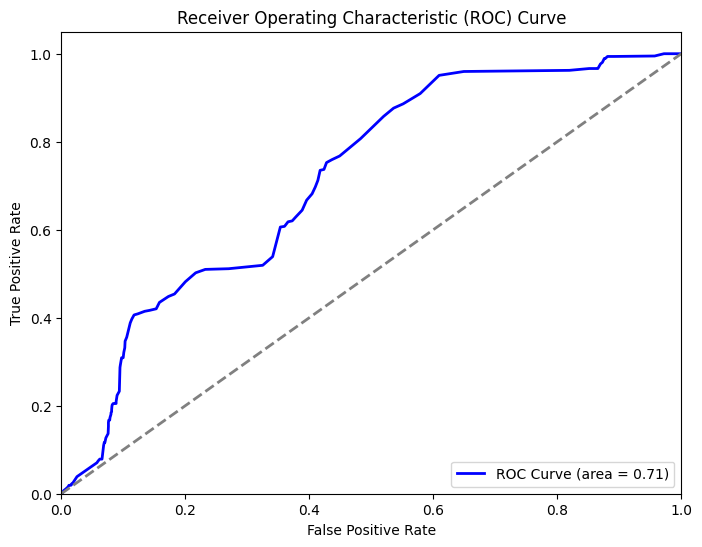

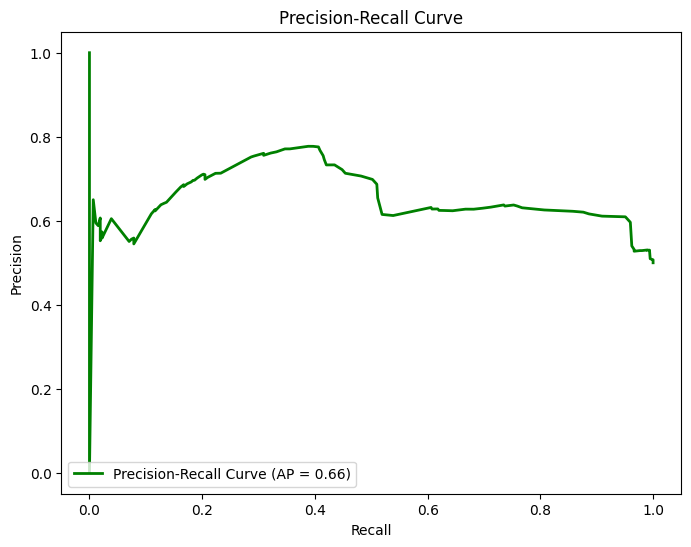

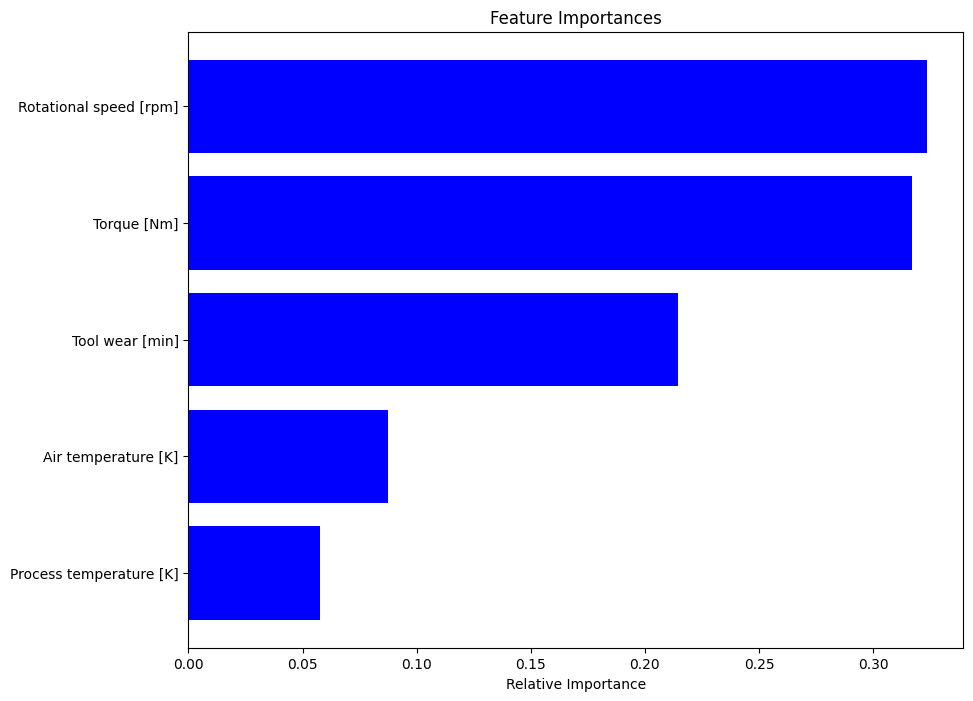

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve

# Plot ROC Curve
def plot_roc_curve(y_test, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Plot Precision-Recall Curve
def plot_precision_recall_curve(y_test, y_pred_prob):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    average_precision = average_precision_score(y_test, y_pred_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# Plot Feature Importances
def plot_feature_importances(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(10, 8))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

# Calculate predicted probabilities
# Assuming X_test is your original test data
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Plot ROC Curve
plot_roc_curve(y_test, y_pred_prob)

# Plot Precision-Recall Curve
plot_precision_recall_curve(y_test, y_pred_prob)

# Plot Feature Importances
plot_feature_importances(best_model, features)
